In [1]:
# 数据处理
import numpy as np
import pandas as pd

#画图
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
%matplotlib inline

#数据前处理
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#建模
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN


# 建模评分
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score

In [2]:
df1 = pd.read_csv('活跃用户-1.csv',engine = 'python', encoding = 'utf-8')
df2 = pd.read_csv('活跃用户-2.csv',engine = 'python', encoding = 'utf-8')
df3 = pd.read_csv('活跃用户-3.csv',engine = 'python', encoding = 'utf-8')
df4 = pd.read_csv('活跃用户-4.csv',engine = 'python', encoding = 'utf-8')
df5 = pd.read_csv('活跃用户-5.csv',engine = 'python', encoding = 'utf-8')
res = pd.concat([df1,df2,df3,df4,df5],axis = 0, ignore_index = True)

In [3]:
for i in res.columns:
    res[i].replace(regex = True, to_replace = r'\t', value = r'', inplace = True)

In [4]:
features = ['接入网', '用户性别', '用户年龄段','入网时长(月)','网龄段'
            ,'是否签约3G','是否签约4G','是否签约2G','终端厂家', '终端名称','硬件终端类型',
           'B域流量区间','出账费用','B域上月2G流量(MB)','B域上月3G流量(MB)','B域上月4G流量(MB)','B域上月通话时长(min)',
           '是否使用2G','是否使用3G','是否使用4G']

In [5]:
res_model = res[features]
res_model['用户年龄段'] = res_model['用户年龄段'].str.extract('(\d+)')
res_model['网龄段'] = res_model['网龄段'].str.extract('(\d+)')
res_model

,接入网,用户性别,用户年龄段,入网时长(月),网龄段,是否签约3G,是否签约4G,是否签约2G,终端厂家,终端名称,硬件终端类型,B域流量区间,出账费用,B域上月2G流量(MB),B域上月3G流量(MB),B域上月4G流量(MB),B域上月通话时长(min),是否使用2G,是否使用3G,是否使用4G
0,5G,,NaN,,NaN,NaN,NaN,NaN,小米,Redmi Note9 pro,5G,0-10MB,6.14,0.00,0.00,0.00,0.0,否,否,是
1,EUTRAN,男,80,38,3,NaN,是,NaN,XIAOTIANCAI,XTCZ5AQ(疑似水货),4G,0-10MB,15.97,0.00,0.00,5.57,0.0,否,是,是
2,EUTRAN,,NaN,,NaN,NaN,NaN,NaN,苹果,苹果iPhone 11（4GB/64GB/全网通）,4G,,NaN,NaN,NaN,NaN,NaN,否,否,是
3,EUTRAN,男,90,51,4,NaN,是,NaN,苹果,苹果iPhone 11（4GB/64GB/全网通）,4G,20-30GB,199.00,0.16,60.72,26612.20,410.0,否,否,是
4,EUTRAN,男,80,102,8,NaN,是,NaN,华为,nova6 5G,5G,70-80GB,415.50,5.23,117.90,81290.95,1238.0,否,否,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207025,EUTRAN,男,90,8,NaN,NaN,是,NaN,欧珀,OPPO R9sk（全网通）,4G,0-10MB,6.00,0.00,0.00,0.00,0.0,否,否,是
207026,EUTRAN,女,90,22,1,NaN,是,NaN,华为,畅享Z 5G,5G,10-20GB,32.20,0.00,8.31,16922.49,81.0,否,否,是
207027,5G,男,90,82,6,NaN,是,NaN,苹果,iPhone12,5G,30-40GB,96.30,0.09,189.95,32502.84,1322.0,否,否,是
207028,EUTRAN,,NaN,,NaN,NaN,NaN,NaN,华为,JER-AN10,5G,,NaN,NaN,NaN,NaN,NaN,否,否,是


In [6]:
res_model['用户性别'] = res_model['用户性别'].apply(lambda x: 1 if x == '男' else (0 if x == '女' else np.nan) )

In [7]:
res_model['入网时长(月)'] = res_model['入网时长(月)'].apply(lambda i: 0 if i == '' else int(float(i)))

In [8]:
res_model['用户年龄段'] = res_model['用户年龄段'].apply(lambda i: 0 if i is np.nan else int(float(i)))

In [9]:
res_model['接入网'] = res_model['接入网'].apply(lambda i: 0 if i == 'EUTRAN' else 1)

In [10]:
res_model['是否使用2G'] = res_model['是否使用2G'].apply(lambda i: 0 if i == '否' else 1)
res_model['是否使用3G'] = res_model['是否使用3G'].apply(lambda i: 0 if i == '否' else 1)
res_model['是否使用4G'] = res_model['是否使用4G'].apply(lambda i: 0 if i == '否' else 1)

In [11]:
res_model=res_model.replace(np.nan, 0)

In [12]:
res_model.出账费用[res_model.出账费用 > 100] = 100

In [13]:
res_model['出账费用归一化'] = (res_model['出账费用'] - res_model['出账费用'].min())/(res_model['出账费用'].max()-res_model['出账费用'].min())

In [14]:
res_model.corr()

,接入网,用户性别,用户年龄段,入网时长(月),出账费用,B域上月2G流量(MB),B域上月3G流量(MB),B域上月4G流量(MB),B域上月通话时长(min),是否使用2G,是否使用3G,是否使用4G,出账费用归一化
接入网,1.000000,-0.006861,0.000519,0.004285,0.054695,0.019221,0.022263,0.041254,0.056228,0.009637,-0.012600,-0.134875,0.054695
用户性别,-0.006861,1.000000,0.531764,0.327759,0.326478,0.055847,0.074766,0.216595,0.185204,-0.001768,0.014610,0.006698,0.326478
用户年龄段,0.000519,0.531764,1.000000,0.411862,0.501194,0.072059,0.105663,0.299737,0.231516,-0.000881,0.023953,0.008291,0.501194
入网时长(月),0.004285,0.327759,0.411862,1.000000,0.488270,0.057306,0.076362,0.094658,0.344671,-0.005710,0.024264,0.010005,0.488270
出账费用,0.054695,0.326478,0.501194,0.488270,1.000000,0.104543,0.177698,0.512331,0.461837,0.005297,0.030577,0.005321,1.000000
B域上月2G流量(MB),0.019221,0.055847,0.072059,0.057306,0.104543,1.000000,0.124934,0.061336,0.066226,0.003166,0.013461,0.001711,0.104543
B域上月3G流量(MB),0.022263,0.074766,0.105663,0.076362,0.177698,0.124934,1.000000,0.132264,0.130002,0.001764,0.015544,0.003580,0.177698
B域上月4G流量(MB),0.041254,0.216595,0.299737,0.094658,0.512331,0.061336,0.132264,1.000000,0.181115,-0.003896,-0.001061,-0.002369,0.512331
B域上月通话时长(min),0.056228,0.185204,0.231516,0.344671,0.461837,0.066226,0.130002,0.181115,1.000000,0.010420,0.029481,0.004663,0.461837
是否使用2G,0.009637,-0.001768,-0.000881,-0.005710,0.005297,0.003166,0.001764,-0.003896,0.010420,1.000000,0.070880,0.003084,0.005297


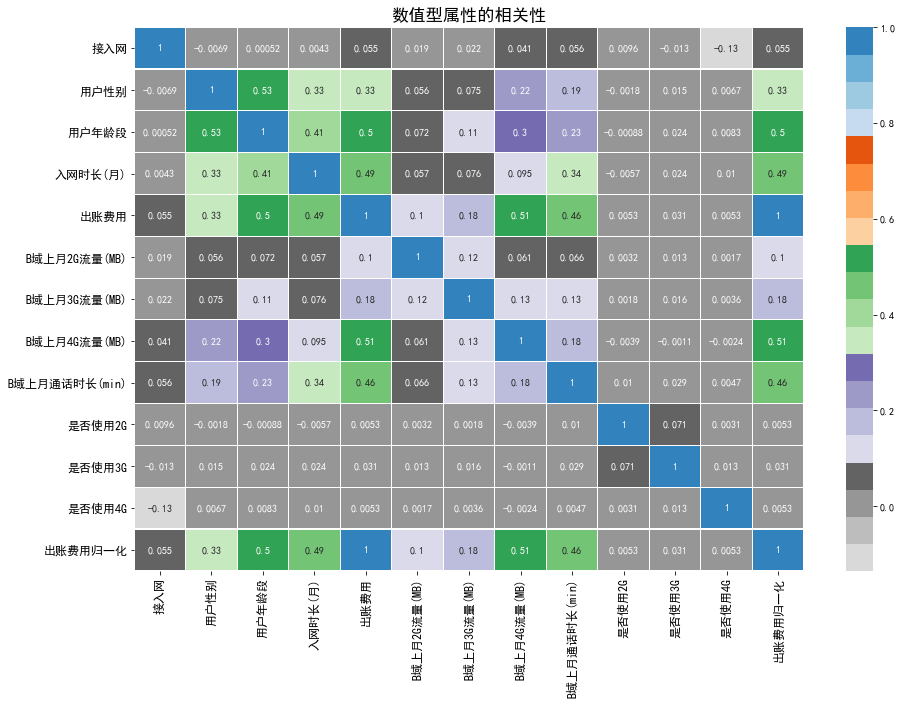

In [15]:
plt.rcParams["font.family"]="SimHei"
plt.figure(figsize=(15, 10))  
sns.heatmap(res_model.corr(), linewidths=0.1, cmap='tab20c_r', annot=True)
plt.title('数值型属性的相关性', fontdict={'fontsize': 'xx-large', 'fontweight':'heavy'}) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 

In [16]:
X = res_model[['出账费用归一化','B域上月4G流量(MB)','B域上月通话时长(min)']]
y = res_model['接入网']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
oversample = SMOTE()
X_resampled_smote, y_resampled_smote = oversample.fit_resample(X, y)

In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
model2 = LogisticRegression()
model2.fit(X_resampled_smote,y_resampled_smote)

LogisticRegression()

In [21]:
model3 = LogisticRegression()
model3.fit(X_resampled,y_resampled)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]
prob_series = pd.Series(y_pred_proba,name='5G的概率',index=y_test.index)
pred_series = pd.Series(y_pred, index=y_test.index, name='是否使用5G')
model_result = pd.concat([X_test,y_test,pred_series,prob_series],axis=1)
model_result.to_csv('model1_result.csv',index = None,encoding = 'utf8')
model_result

,出账费用归一化,B域上月4G流量(MB),B域上月通话时长(min),接入网,是否使用5G,5G的概率
57418,0.990076,8600.53,853.0,0,0,0.060279
60035,0.486950,3227.35,171.0,0,0,0.049662
31978,0.684430,41418.50,201.0,0,0,0.068453
109999,0.311303,1766.57,21.0,0,0,0.048723
162238,0.591644,15723.86,1368.0,0,0,0.097655
...,...,...,...,...,...,...
124845,0.570309,11643.91,194.0,0,0,0.052907
108865,0.186266,0.24,48.0,0,0,0.051061
82252,0.203136,17689.10,85.0,0,0,0.061805
102700,0.207105,624.55,8.0,0,0,0.049928


In [23]:
y_pred2 = model2.predict(X_resampled_smote)
y_pred_proba2 = model2.predict_proba(X_resampled_smote)
y_pred_proba2 = y_pred_proba2[:,1]
prob_series2 = pd.Series(y_pred_proba2,name='5G的概率',index=y_resampled_smote.index)
pred_series2 = pd.Series(y_pred2, index=y_resampled_smote.index, name='是否使用5G')
model2_result = pd.concat([X_resampled_smote,y_resampled_smote,pred_series2,prob_series2],axis=1)
model2_result.to_csv('model2_result.csv',index = None,encoding = 'utf8')
model2_result

,出账费用归一化,B域上月4G流量(MB),B域上月通话时长(min),接入网,是否使用5G,5G的概率
0,0.068572,0.000000,0.000000,1,0,0.500000
1,0.166121,5.570000,0.000000,0,1,0.500007
2,0.007641,0.000000,0.000000,0,0,0.500000
3,1.000000,26612.200000,410.000000,0,1,0.566411
4,1.000000,81290.950000,1238.000000,0,1,0.692479
...,...,...,...,...,...,...
390983,0.427652,4068.738189,88.464997,1,1,0.512242
390984,1.000000,71484.524635,97.881555,1,1,0.599084
390985,0.007641,0.000000,0.000000,1,0,0.500000
390986,0.007641,0.000000,0.000000,1,0,0.500000


In [24]:
y_pred3 = model3.predict(X_resampled)
y_pred_proba3 = model3.predict_proba(X_resampled)
y_pred_proba3 = y_pred_proba3[:,1]
prob_series3 = pd.Series(y_pred_proba3,name='5G的概率',index=y_resampled.index)
pred_series3 = pd.Series(y_pred3, index=y_resampled.index, name='是否使用5G')
model3_result = pd.concat([X_resampled,y_resampled,pred_series3,prob_series3],axis=1)
model3_result.to_csv('model3_result.csv',index = None,encoding = 'utf8')
model3_result

,出账费用归一化,B域上月4G流量(MB),B域上月通话时长(min),接入网,是否使用5G,5G的概率
0,0.075122,0.00,123.0,0,1,0.511330
1,0.996031,11801.03,859.0,0,1,0.591724
2,0.007641,0.00,0.0,0,0,0.500000
3,0.198174,0.00,17.0,0,1,0.501566
4,0.007641,9069.45,28.0,0,1,0.513054
...,...,...,...,...,...,...
23067,1.000000,12461.02,112.0,1,1,0.524694
23068,1.000000,9688.13,1345.0,1,1,0.631915
23069,1.000000,189.94,157.0,1,1,0.514680
23070,0.007641,0.00,0.0,1,0,0.500000


In [25]:
m1_score = model.score(X_test,y_test)
m2_score = model2.score(X_resampled_smote,y_resampled_smote)
m3_score = model3.score(X_resampled,y_resampled)
print('\n模型{}的成绩为：{}'.format(1, m1_score))
print('\n模型{}的成绩为：{}'.format(2, m2_score))
print('\n模型{}的成绩为：{}'.format(3, m3_score))


模型1的成绩为：0.9419890837076752

模型2的成绩为：0.4925138367417926

模型3的成绩为：0.49375866851595007
